# Test Input Pipeline

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

from src.input_pipeline import InputPipeline

In [35]:
df = pd.read_csv('data/data.csv')
df.head()

,make_id,model_id,released_year,image_name,view_point,x1,y1,x2,y2
0,1,1101,2011.0,07b90decb92ba6.jpg,1,124,33,674,480
1,1,1101,2011.0,2272c7d324cf79.jpg,4,52,153,849,506
2,1,1101,2011.0,3a62131af5fe8e.jpg,4,85,107,682,469
3,1,1101,2011.0,5133ca181b82af.jpg,2,91,23,759,551
4,1,1101,2011.0,6632ec1c2f7f87.jpg,5,58,134,707,504


In [36]:
input_dir = 'data/image/'

df['filename'] = input_dir + \
                 df['make_id'].astype(str) + '/' + \
                 df['model_id'].astype(str) + '/' + \
                 df['released_year'].apply(lambda x: str(int(x)) if not np.isnan(x) else 'unknown') + '/' + \
                 df['image_name']
df = df.sample(frac=1).reset_index(drop=True)

In [37]:
mat = loadmat('data/misc/make_model_name.mat')
make_names = mat['make_names'].tolist()
model_names = mat['model_names'].tolist()

## Load Input Pipeline

In [38]:
pipeline = InputPipeline(img_size=(299, 299))

In [39]:
ds = pipeline.load_dataset(df['filename'][:6], df['model_id'][:6], batch_size=30)

## Images in One Batch

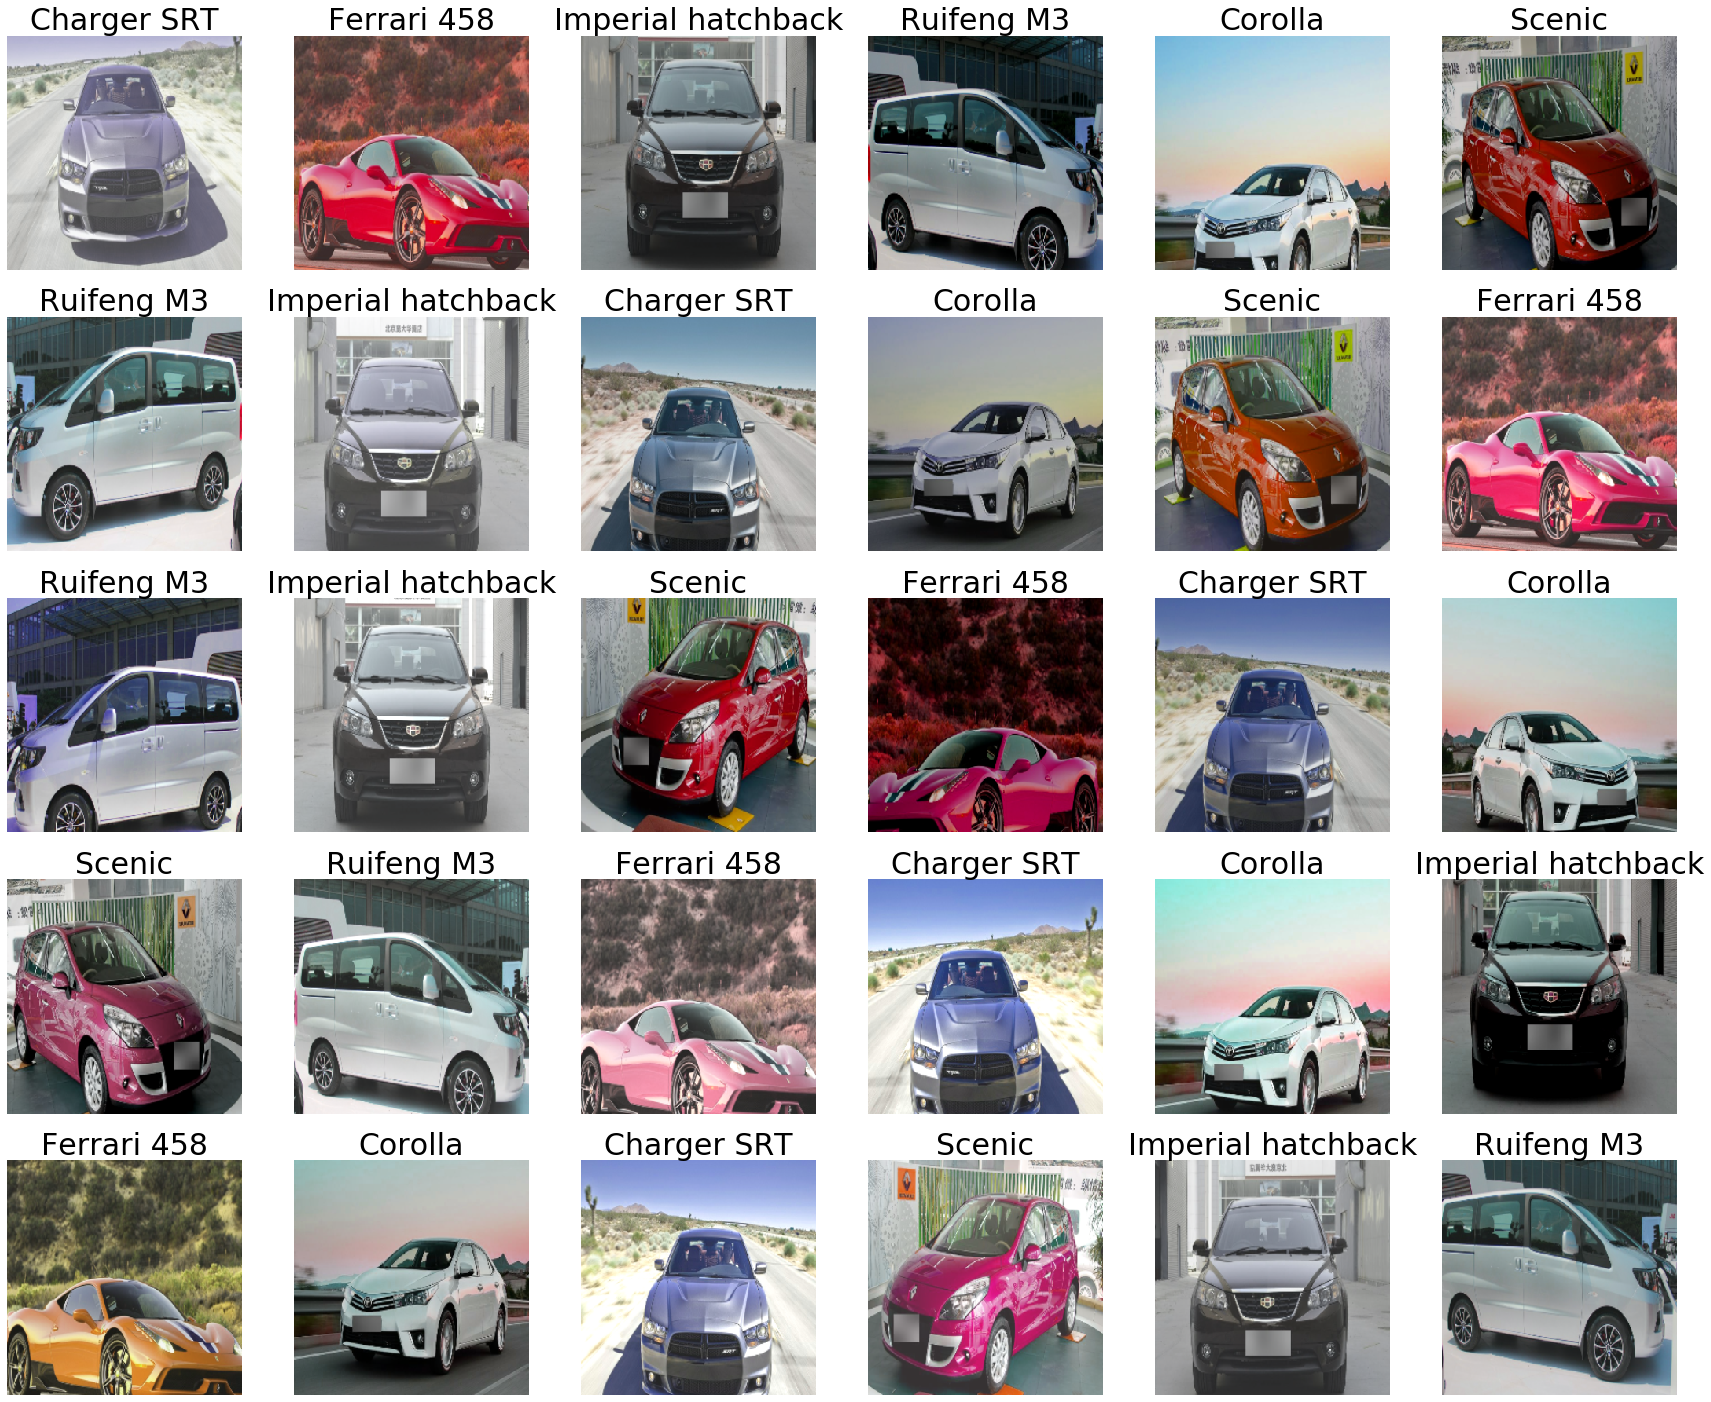

In [41]:
columns=6
rows=5
fig = plt.figure(figsize=(columns * 5, rows * 5))
for images, labels in ds.take(1):
    for i in range(columns * rows):
        ax = plt.subplot(rows, columns, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(model_names[labels[i].numpy()][0][0], fontsize=30)
        plt.axis("off")